# Sentimental Analysis Assignment- Elon Musk Tweets

## Importing Libraries

In [12]:
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

## Loading Dataset

In [2]:
tweets = pd.read_csv("Elon_musk.csv",encoding = "latin-1")
tweets.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


## Dropping a 1st column as it is not needed

In [3]:
tweets_1=tweets.drop(["Unnamed: 0"], axis=1)

In [4]:
tweets_1

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


## Since User handles does not carry any information, so we will remove them

In [5]:
import re

In [6]:
# function to remove user handles
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt  

# remove user handles
tweets_1['Text'] = tweets_1['Text'].apply(lambda row:remove_pattern(row, "@[\w]*"))


# first five observations
tweets_1.head(15)

,Text
0,Im an alien
1,Ray tracing on Cyberpunk with HDR is next-lev...
2,Great interview!
3,Doge is underestimated
4,Congratulations Tesla China for amazing execu...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj
6,"Frodo was the underdoge,\nAll thought he would..."
7,Haha thanks :)
8,Indeed! Tweets definitely do not represent r...
9,The most entertaining outcome is the most likely


## Removing whitespaces

In [7]:
tweets_1 = [Text.strip() for Text in tweets_1.Text] # remove both the leading and the trailing characters
tweets_1 = [Text for Text in tweets_1 if Text] # removes empty strings, because they are considered in Python as False
tweets_1[0:10]

['I\x92m an alien',
 'Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 'Great interview!',
 'Doge is underestimated',
 'Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 'Haha thanks :)',
 'Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

## joining the list into one string/text

In [8]:
tweets_text =' '.join(tweets_1)
tweets_text

'I\x92m an alien Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? Great interview! Doge is underestimated Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM Haha thanks :) Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler He definitely has issues, but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923><U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won\x92t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to launch the first tw

## Tokenization

In [13]:
import nltk
from nltk.tokenize import word_tokenize
bag_of_words_2 =word_tokenize(tweets_text)
print(bag_of_words_2)

['I\x92m', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https', ':', '//t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https', ':', '//t.co/zGxJFDzzrM', 'Haha', 'thanks', ':', ')', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'https', ':', '//t.co/3rWE9uHSTS', 'It\x92s', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', ',', 'so',

## Remove Punctuations

In [15]:
no_punt_text = tweets_text.translate(str.maketrans('','',string.punctuation))
no_punt_text

'I\x92m an alien Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it Great interview Doge is underestimated Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM Haha thanks  Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler He definitely has issues but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won\x92t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on o

In [16]:
bag_of_words_3 =word_tokenize(no_punt_text)
print(bag_of_words_3)

['I\x92m', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'httpstcozGxJFDzzrM', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'httpstco3rWE9uHSTS', 'It\x92s', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'He', 'definitely', 'has', 'issues', 'but', 'the', 'sentencing', 'seem

## Remove Stopwords

In [17]:
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in bag_of_words_3 if not word in my_stop_words]
print(no_stop_tokens[0:40])

['I\x92m', 'alien', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'Great', 'interview', 'Doge', 'underestimated', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'httpstcozGxJFDzzrM', 'Haha', 'thanks', 'Indeed', 'Tweets']


[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [18]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:70])

['i\x92m', 'alien', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'great', 'interview', 'doge', 'underestimated', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'haha', 'thanks', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'just', 'sent', 'just', 'agree', 'clubhouse', 'httpstco3rwe9uhsts', 'it\x92s', 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'definitely', 'issues', 'sentencing', 'seems', 'bit']


## Stemming

In [19]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['i\x92m', 'alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'great', 'interview', 'doge', 'underestim', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'haha', 'thank', 'inde', 'tweet']


## Lemmatization

In [20]:
import spacy

In [22]:
!python -m spacy download en

2022-05-08 13:16:50.649898: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-05-08 13:16:50.649931: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.



[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [23]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm') 

In [24]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:100])

Im alien Ray tracing Cyberpunk HDR nextlevel Have tried Great interview Doge underestimated Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox httpstco9WFKMYu2oj Frodo underdoge All thought would fail Himself httpstcozGxJFDzzrM Haha thanks Indeed Tweets definitely represent realworld time allocation The entertaining outcome likely Just sent Just agree Clubhouse httpstco3rWE9uHSTS Its getting real Bought Dogecoin lil X toddler hodler He definitely issues sentencing seems bit high Thanks fixing Please unlock account U0001F923U0001F923 This true power haha httpstcoFc9uhQSd7O Any crypto wallet wont give private keys avoided costs Your app sucks RT NASA selected Falcon Heavy launch


In [25]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:50])

['I\x92m', 'alien', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'great', 'interview', 'Doge', 'underestimate', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'Haha', 'thank', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'just']


In [26]:
cleaned_text =' '.join(lemmas)
cleaned_text

'I\x92m alien Ray trace Cyberpunk HDR nextlevel have try great interview Doge underestimate Congratulations Tesla China amazing execution last year now next even Happy New Year Ox httpstco9WFKMYu2oj Frodo underdoge all thought would fail himself httpstcozgxjfdzzrm Haha thank Indeed Tweets definitely represent realworld time allocation the entertaining outcome likely just sent just agree Clubhouse httpstco3rWE9uHSTS It\x92s get real Bought Dogecoin lil x toddler hodler he definitely issue sentencing seem bit high thank fix please unlock account U0001F923U0001F923 this true power haha httpstcofc9uhqsd7o any crypto wallet won\x92t give private key avoid cost your app suck RT NASA select Falcon Heavy launch first two element lunar gateway together one mission httpstco3pwt yes once predict cash flow reasonably well starlink IPO Starlink staggeringly difficult technical amp economic endeavor however httpstco9z8ac6skqx spacex need pass deep chasm negative cash flow next year httpstco7j1c92hdj

## Feature Extraction

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [28]:
print(vectorizer.vocabulary_)

{'alien': 200, 'ray': 3079, 'trace': 3760, 'cyberpunk': 789, 'hdr': 1393, 'nextlevel': 2677, 'have': 1388, 'try': 3791, 'great': 1338, 'interview': 2249, 'doge': 917, 'underestimate': 3916, 'congratulations': 694, 'tesla': 3666, 'china': 600, 'amazing': 224, 'execution': 1084, 'last': 2340, 'year': 4143, 'now': 2704, 'next': 2676, 'even': 1059, 'happy': 1376, 'new': 2674, 'ox': 2806, 'httpstco9wfkmyu2oj': 1578, 'frodo': 1239, 'underdoge': 3915, 'all': 203, 'thought': 3703, 'would': 4128, 'fail': 1119, 'himself': 1438, 'httpstcozgxjfdzzrm': 2111, 'haha': 1365, 'thank': 3677, 'indeed': 2189, 'tweets': 3811, 'definitely': 827, 'represent': 3148, 'realworld': 3094, 'time': 3720, 'allocation': 205, 'the': 3682, 'entertaining': 1030, 'outcome': 2785, 'likely': 2397, 'just': 2295, 'sent': 3297, 'agree': 182, 'clubhouse': 630, 'httpstco3rwe9uhsts': 1516, 'it': 2270, 'get': 1298, 'real': 3089, 'bought': 471, 'dogecoin': 919, 'lil': 2398, 'toddler': 3732, 'hodler': 1444, 'he': 1394, 'issue': 226

In [29]:
print(vectorizer.get_feature_names()[5:100])

['107', '10x', '11', '112', '12', '122', '13', '130pm', '14', '140pm', '149watt', '14yearold', '15', '150', '155', '16', '162', '17', '18', '1880s', '1b', '1st', '20', '200', '2007', '2008', '2009', '2012', '2017', '2020', '2021', '2024', '2026', '2030', '20k', '210', '218', '21st', '22', '225', '23', '230', '24', '240am', '25', '250', '250kw', '25d', '25gunscom', '25k', '25th', '28', '28th', '29', '2k', '2nd', '2v', '30', '300', '301', '304', '304l', '31', '33', '330', '360', '37', '3800', '394', '39a', '3d', '3rd', '40', '400', '42', '420', '4227', '430', '43rd', '445pm', '448', '4530000', '4680', '479000', '48', '4d', '4th', '50', '50000', '50k', '60', '60000', '65', '69420', '6f']


In [30]:
print(X.toarray()[50:100])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Count Vectorizer with N-Grams(Bigrams & Trigrams)

In [31]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(lemmas)

In [32]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['actually', 'also', 'amp', 'back', 'big', 'booster', 'car', 'come', 'complete', 'cool', 'could', 'crew', 'day', 'do', 'don', 'dragon', 'earth', 'engine', 'even', 'ever', 'exactly', 'falcon', 'first', 'flight', 'fsd', 'future', 'get', 'go', 'good', 'great', 'haha', 'hard', 'high', 'if', 'it', 'land', 'launch', 'like', 'look', 'lot', 'make', 'many', 'mars', 'maybe', 'mission', 'model', 'month', 'much', 'need', 'new', 'next', 'no', 'not', 'one', 'part', 'people', 'point', 'pretty', 'probably', 'production', 're', 'right', 'rocket', 'rt', 'say', 'soon', 'space', 'spacex', 'starlink', 'starship', 'start', 'still', 'sure', 'take', 'tesla', 'test', 'thank', 'that', 'the', 'there', 'they', 'think', 'this', 'time', 'true', 'try', 'u0001f923u0001f923', 'use', 'way', 'we', 'we re', 'week', 'well', 'will', 'work', 'would', 'yeah', 'year', 'yes', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## TF-IDF Vectorizer

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(lemmas)

In [34]:
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['10', '100', '13', '20', '2020', '30', '4d', '60', 'able', 'absolutely', 'access', 'accurate', 'actually', 'add', 'after', 'ago', 'agree', 'ai', 'air', 'all', 'almost', 'already', 'also', 'although', 'always', 'amazing', 'amp', 'and', 'another', 'appear', 'apply', 'appreciate', 'approval', 'arm', 'around', 'article', 'as', 'astronaut', 'at', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'base', 'battery', 'be', 'become', 'berlin', 'beta', 'big', 'bit', 'boca', 'body', 'booster', 'bring', 'bs', 'build', 'burn', 'but', 'buy', 'cake', 'call', 'camera', 'can', 'car', 'cargo', 'cast', 'catch', 'cell', 'chance', 'change', 'china', 'civilization', 'close', 'cold', 'color', 'come', 'company', 'complete', 'computer', 'confirm', 'congratulations', 'control', 'cool', 'cost', 'could', 'course', 'cov2', 'crazy', 'create', 'crew', 'crew1', 'critical', 'curevac', 'cyberpunk', 'cybertruck', 'day', 'deep', 'definitely', 'delivery', 'design', 'didn', 'difference', 'different', 'do', 'dock', 'doesn', 'd

## WordCloud

In [35]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

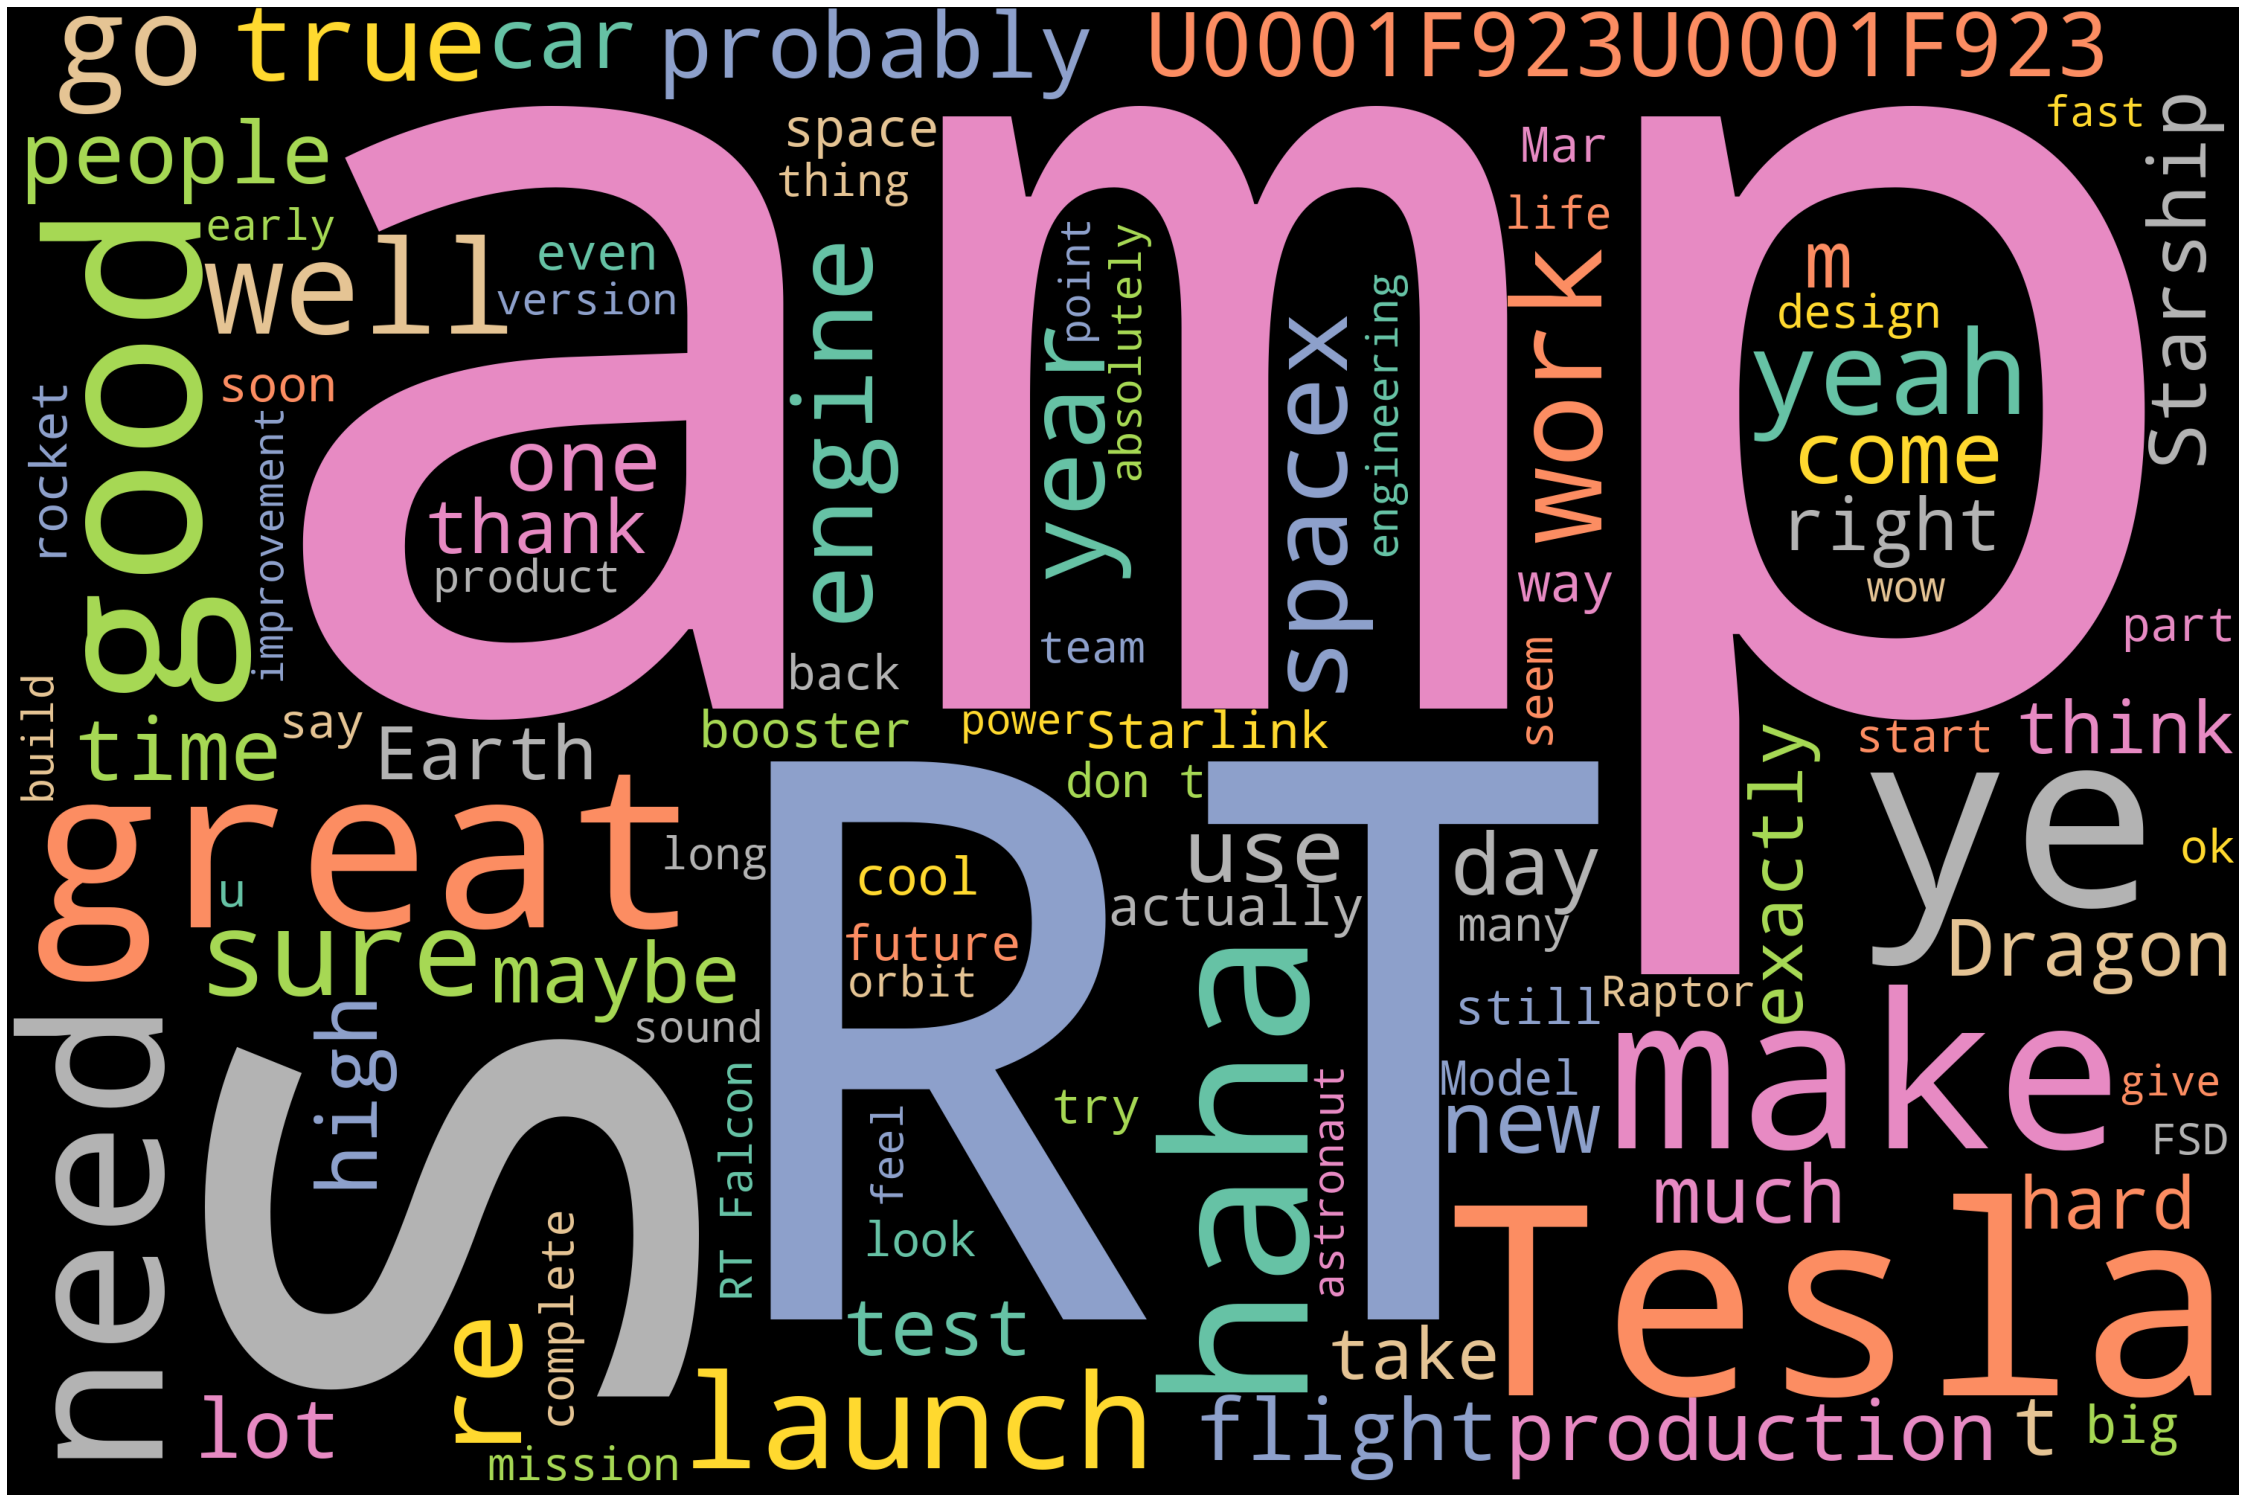

In [36]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(cleaned_text)
# Plot
plot_cloud(wordcloud)

## Part of Speech Tagging

In [37]:
nlp = spacy.load('en_core_web_sm')

one_block = cleaned_text
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [38]:
for token in doc_block[0:40]:
    print(token, token.pos_)

Im PROPN
alien ADJ
Ray PROPN
trace NOUN
Cyberpunk PROPN
HDR PROPN
nextlevel NOUN
have AUX
try VERB
great ADJ
interview NOUN
Doge PROPN
underestimate VERB
Congratulations PROPN
Tesla PROPN
China PROPN
amazing ADJ
execution NOUN
last ADJ
year NOUN
now ADV
next ADV
even ADV
Happy PROPN
New PROPN
Year PROPN
Ox PROPN
httpstco9WFKMYu2oj PROPN
Frodo PROPN
underdoge ADJ
all DET
thought NOUN
would AUX
fail VERB
himself PRON
httpstcozgxjfdzzrm ADV
Haha PROPN
thank VERB
Indeed ADV
Tweets PROPN


In [39]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:30])

['execution', 'year', 'thought', 'fail', 'thank', 'represent', 'allocation', 'outcome', 'sent', 'agree', 'get', 'toddler', 'hodler', 'issue', 'sentencing', 'seem', 'bit', 'thank', 'fix', 'account', 'power', 'httpstcofc9uhqsd7o', 'crypto', 'wallet', 'won\x92t']


In [40]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,amp,144
1,make,64
2,launch,51
3,year,47
4,need,46
5,work,44
6,go,44
7,come,38
8,get,37
9,engine,36


<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

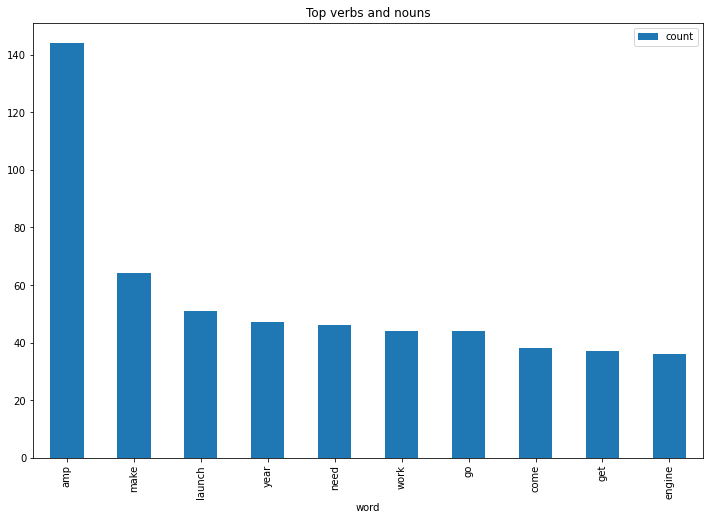

In [41]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

## Emotion Mining/Sentimental Analysis

## Using TextBlob

In [42]:
import textblob

In [43]:
# import packages
from textblob import TextBlob

In [44]:
data = TextBlob(cleaned_text)

In [45]:
data.sentiment

Sentiment(polarity=0.17360318090287227, subjectivity=0.5174305237363782)

# Conclusion-  The Polarity of dataset is 0.1736 It means most of the tweets shows neutral sentiment.¶
# The subjectivity is higher (0.5174) it means that the text contains personal opinion rather than factual information

## Vader Sentimental Analysis

In [46]:
!pip install vaderSentiment

In [47]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [48]:
# function to print sentiments of the sentence.
def sentiment_scores(sentence):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
     
    print("Overall sentiment dictionary is : ", sentiment_dict)
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")

In [51]:
sentiment_scores(lemmas)

Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
